In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.7/site-packages (0.20.2)


In [2]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random 

import warnings
warnings.filterwarnings("ignore")

In [3]:
print(sklearn.__version__)

0.20.2


In [4]:
print(np.__version__)

1.16.1


In [5]:
print(pd.__version__)

0.23.4


In [6]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

In [7]:
data.shape

(150, 2)

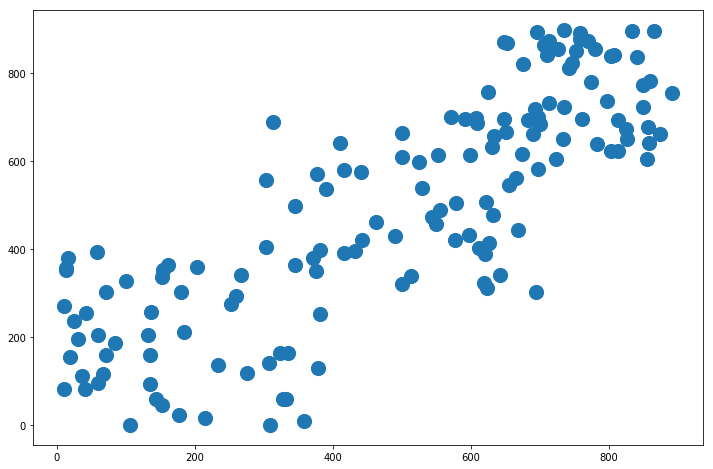

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(data[:,0], data[:,1], s=200)

In [9]:
labels_1 = np.array([0 for i in range(50)])

labels_2 = np.array([1 for i in range(50)])

labels_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})

df.sample(10)

,data_x,data_y,labels
54,552.0,613.0,1
140,735.0,898.0,2
133,892.0,754.0,2
8,215.0,16.0,0
111,859.0,642.0,2
41,309.0,1.0,0
40,136.0,94.0,0
2,84.0,187.0,0
42,308.0,141.0,0
9,19.0,155.0,0


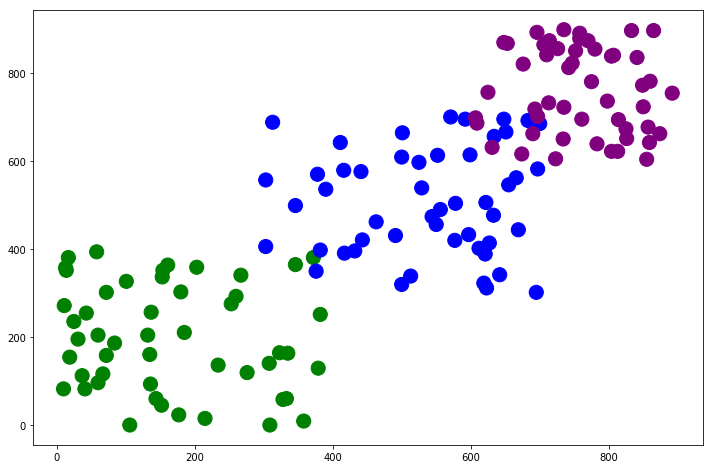

In [12]:
colors = ['green','blue','purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, 
            cmap=matplotlib.colors.ListedColormap(colors))

In [13]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [14]:
kmeans_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
centroids = kmeans_model.cluster_centers_

centroids

array([[507.45454545, 471.34090909],
       [743.5       , 747.20689655],
       [157.29166667, 191.9375    ]])

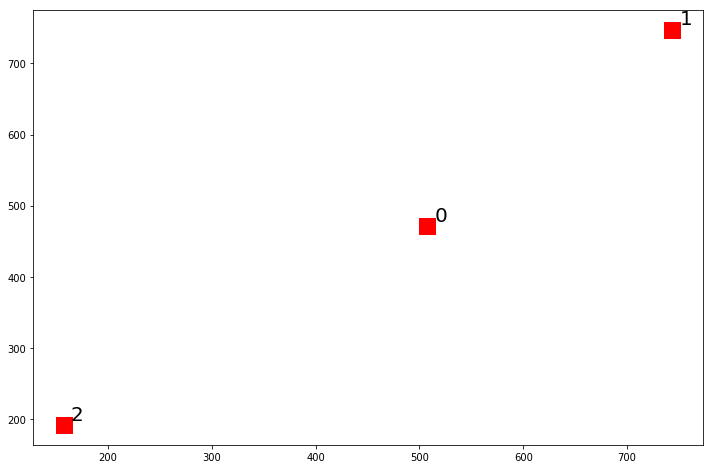

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [17]:
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))

print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))

print("v_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))

print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))

print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels,  kmeans_model.labels_))

print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.8094266260920742
Completeness_score:  0.8144889462744598
v_measure_score:  0.8119498956604883
Adjusted_rand_score:  0.8149750831015167
Adjusted_mutual_info_score:  0.8070409158889033
Silhouette_score:  0.5133845400952297


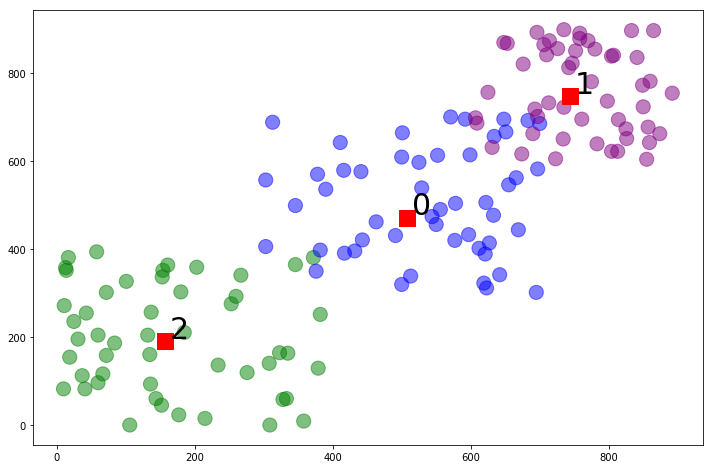

In [18]:
colors = ['green','blue','purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [19]:
data_test = np.array([[442., 621.],
                      [ 50., 153.],
                      [ 333., 373.],
                      [835., 816.]])

In [20]:
label_pred = kmeans_model.predict(data_test)

In [21]:
label_pred

array([0, 2, 0, 1], dtype=int32)

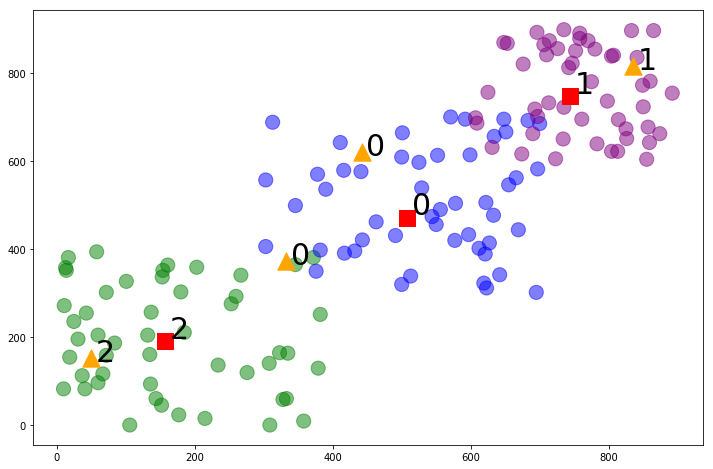

In [22]:
colors = ['green','blue','purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
    
plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')

for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize=30)
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)